In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02)
X = X.reshape(X.shape[0], 1)
print(X.shape)
print(X.ndim)
print("printing X")
print(X)

y = weight * X + bias
print("printing y")
print(y)


torch.Size([50, 1])
2
printing X
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
printing y
tensor([[0.3000],
        [0.3140],
        [0.3280],
 

In [3]:
# x = torch.tensor([1, 2, 3, 4])
# print(x)

# print(torch.unsqueeze(x, 0))
# print(torch.unsqueeze(x, -2))
X.shape[0]

50

In [4]:
train_split = int(0.8 * len(X))
print(train_split)
X_train, y_train = X[ : train_split], y[ : train_split]
X_test, y_test = X[train_split : ], y[train_split : ]

40


In [5]:
def plot_predictions(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=None):
    
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_label, c="b", s=4, label="training_data")

    plt.scatter(test_data, test_label, c="g", s=4, label="test_data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

    plt.legend(prop={"size": 14});

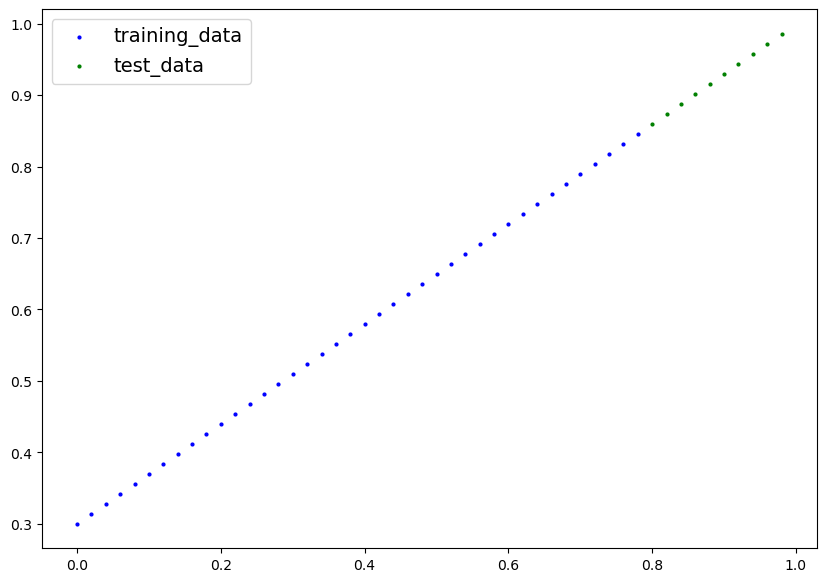

In [6]:
plot_predictions()

In [7]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [8]:
torch.manual_seed(50)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.4625], requires_grad=True),
 Parameter containing:
 tensor([-0.1692], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4625])), ('bias', tensor([-0.1692]))])

In [10]:
with torch.inference_mode():
    y_preds = model_0(X_test)

# print(y_preds)
# list(model_0.parameters())

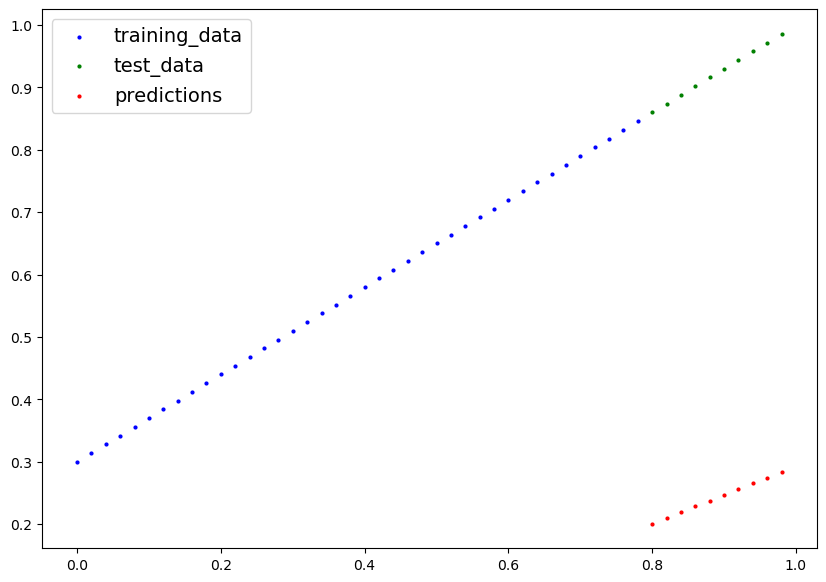

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
# y_test - y_preds


In [13]:
loss_func = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [17]:
torch.manual_seed = 42
epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)
    loss = loss_func(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_func(test_pred, y_test)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

    

Epoch: 0 | MAE Train Loss: 0.561846137046814 | MAE Test Loss: 0.6671295166015625 
Epoch: 10 | MAE Train Loss: 0.4466361403465271 | MAE Test Loss: 0.5324195623397827 
Epoch: 20 | MAE Train Loss: 0.3314262330532074 | MAE Test Loss: 0.3977096676826477 
Epoch: 30 | MAE Train Loss: 0.21621623635292053 | MAE Test Loss: 0.2629997730255127 
Epoch: 40 | MAE Train Loss: 0.10100623220205307 | MAE Test Loss: 0.12828977406024933 
Epoch: 50 | MAE Train Loss: 0.008853638544678688 | MAE Test Loss: 0.0201592855155468 
Epoch: 60 | MAE Train Loss: 0.005341595504432917 | MAE Test Loss: 0.01188674010336399 
Epoch: 70 | MAE Train Loss: 0.0019098080229014158 | MAE Test Loss: 0.002936250064522028 
Epoch: 80 | MAE Train Loss: 0.004966678563505411 | MAE Test Loss: 0.0049797953106462955 
Epoch: 90 | MAE Train Loss: 0.004966678563505411 | MAE Test Loss: 0.0049797953106462955 
